In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall


0: 160x160 300 Palm_Trees, 156.7ms
Speed: 0.9ms preprocess, 156.7ms inference, 1.4ms postprocess per image at shape (1, 3, 160, 160)


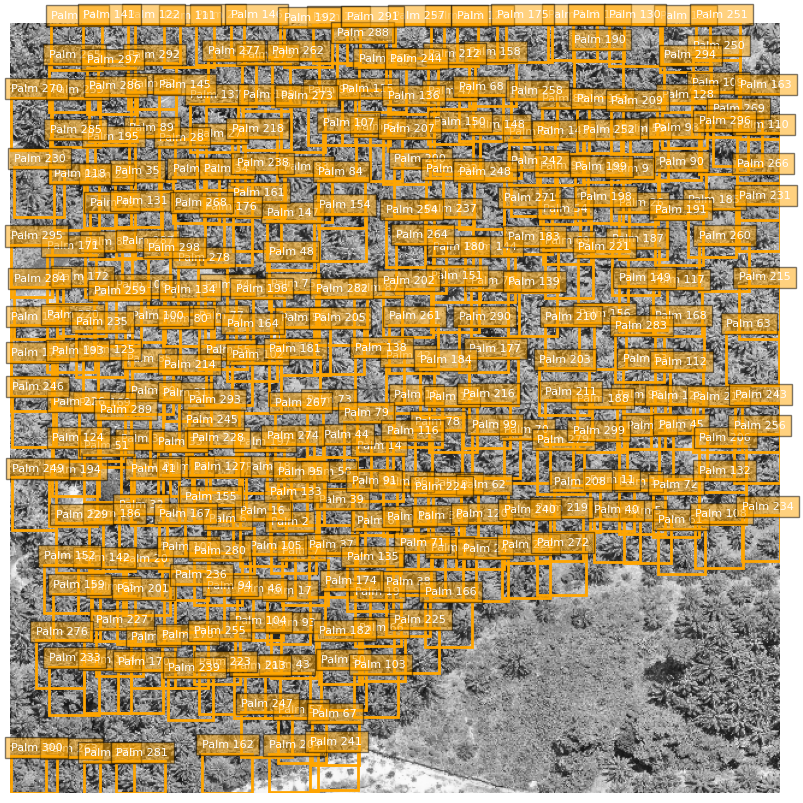

Total objek terdeteksi: 300


In [16]:
import cv2
import torch
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# 1️⃣ Load Model
model = YOLO("/content/best.pt")

# 2️⃣ Image Preprocessing (Stretch Resize, Grayscale, Augmentasi)
def preprocess_image(image_path):
    # Load Image
    image = cv2.imread(image_path)

    # Convert to Grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Convert ke 3 channel agar cocok dengan YOLO
    image_gray = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)

    # Resize Stretch 640x640
    image_resized = cv2.resize(image_gray, (640, 640))

    return image_resized

# 3️⃣ Inference Function
def run_inference(image_path):
    # Preprocess Image
    image = preprocess_image(image_path)

    # Run Inference dengan YOLO (pastikan format input sesuai)
    results = model(image, conf=0.4, iou=0.5)  # Bisa coba conf lebih rendah kalau tidak muncul

    return results, image  # Kembalikan juga gambar asli

# 4️⃣ Post Processing (Visualisasi Bounding Box)
def visualize_results(image, results):
    # Konversi gambar ke RGB untuk plt
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Ambil bounding box hasil inferensi
    boxes = results[0].boxes.xyxy.cpu().numpy()  # (xmin, ymin, xmax, ymax)
    scores = results[0].boxes.conf.cpu().numpy()  # Confidence Score
    class_ids = results[0].boxes.cls.cpu().numpy().astype(int)  # Class IDs
    class_names = model.names  # Nama Kelas

    # Gambar Bounding Box
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    for i, (box, score, class_id) in enumerate(zip(boxes, scores, class_ids), start=1):
        xmin, ymin, xmax, ymax = box
        label = f"Palm {i}"  # Ganti label dengan nomor urutan
        color = 'orange'

        # Gambar bounding box
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor=color, linewidth=2))
        ax.text(xmin, ymin - 5, label, fontsize=8, color='white', bbox=dict(facecolor=color, alpha=0.5))


    plt.axis('off')
    plt.show()
    print(f"Total objek terdeteksi: {len(boxes)}")

# 5️⃣ Run Pipeline
image_path = "/content/ai_assignment_20241202_count.jpeg"  # Ganti dengan gambar yang ingin diuji
results, processed_image = run_inference(image_path)
visualize_results(processed_image, results)